In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
'''
Problems 1 : According to compas assesment, which race have the highest decile score and which race have
the lowest decile score?
Problem 2 : Do people have different race rate differently by compas? 

'''

In [172]:
df = pd.read_csv('Data/compas.csv')
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,8/14/13,Male,4/18/47,69,Greater than 45,Other,...,1,Low,8/14/13,7/7/14,7/14/14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,1/27/13,Male,1/22/82,34,25 - 45,African-American,...,1,Low,1/27/13,1/26/13,2/5/13,0,9,159,1,1
2,4,ed philo,ed,philo,4/14/13,Male,5/14/91,24,Less than 25,African-American,...,3,Low,4/14/13,6/16/13,6/16/13,4,0,63,0,1
3,5,marcu brown,marcu,brown,1/13/13,Male,1/21/93,23,Less than 25,African-American,...,6,Medium,1/13/13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,3/26/13,Male,1/22/73,43,25 - 45,Other,...,1,Low,3/26/13,NaN,NaN,2,0,1102,0,0


In [173]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [174]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [175]:
df1 = df[['id','sex','race','c_offense_date','r_offense_date','decile_score','c_charge_degree',
          'priors_count', 'is_recid']]
df1


,id,sex,race,c_offense_date,r_offense_date,decile_score,c_charge_degree,priors_count,is_recid
0,1,Male,Other,8/13/13,NaN,1,F,0,0
1,3,Male,African-American,1/26/13,7/5/13,3,F,0,1
2,4,Male,African-American,4/13/13,6/16/13,4,F,4,1
3,5,Male,African-American,1/12/13,NaN,8,F,1,0
4,6,Male,Other,NaN,NaN,1,F,2,0
...,...,...,...,...,...,...,...,...,...
7209,10996,Male,African-American,11/22/13,NaN,7,F,0,0
7210,10997,Male,African-American,1/31/14,NaN,3,F,0,0
7211,10999,Male,Other,1/13/14,NaN,1,F,0,0
7212,11000,Female,African-American,3/8/14,NaN,2,M,3,0


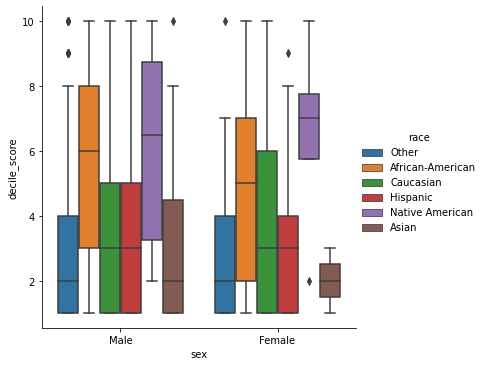

In [176]:
sns.catplot(x = 'sex', y = 'decile_score', data = df1, kind = 'box',
           hue = 'race') # This is how compas rate criminal by race  
'''This shows that compas rate Native American criminals to have highest score, African American criminals
to have second highest score'''

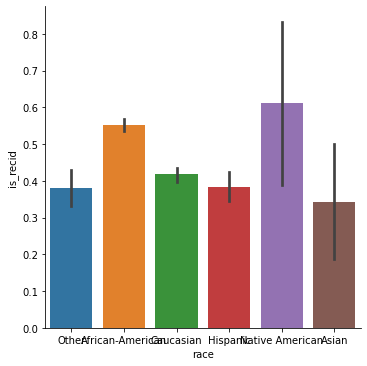

In [177]:
sns.catplot(x = 'race', y ='is_recid', data =df1, kind = 'bar')

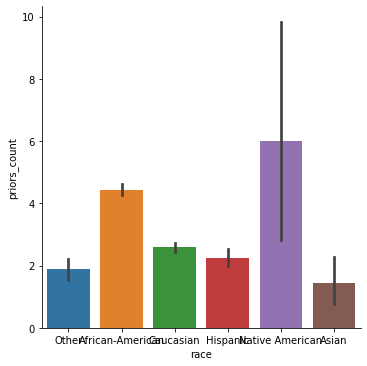

In [178]:
sns.catplot(x = 'race', y = 'priors_count', data = df1, kind = 'bar')
# The range of Native American is too wide, check if they have outliers

In [192]:
df1['total_count'] = df1.priors_count + df1.is_recid
df1 # add a columns called 'total_count' that represent the total criminal acts commited for each criminal

<ipython-input-192-74d354cd3200>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_count'] = df1.priors_count + df1.is_recid


,id,sex,race,c_offense_date,r_offense_date,decile_score,c_charge_degree,priors_count,is_recid,total_count
0,1,Male,Other,8/13/13,NaN,1,F,0,0,0
1,3,Male,African-American,1/26/13,7/5/13,3,F,0,1,1
2,4,Male,African-American,4/13/13,6/16/13,4,F,4,1,5
3,5,Male,African-American,1/12/13,NaN,8,F,1,0,1
4,6,Male,Other,NaN,NaN,1,F,2,0,2
...,...,...,...,...,...,...,...,...,...,...
7209,10996,Male,African-American,11/22/13,NaN,7,F,0,0,0
7210,10997,Male,African-American,1/31/14,NaN,3,F,0,0,0
7211,10999,Male,Other,1/13/14,NaN,1,F,0,0,0
7212,11000,Female,African-American,3/8/14,NaN,2,M,3,0,3


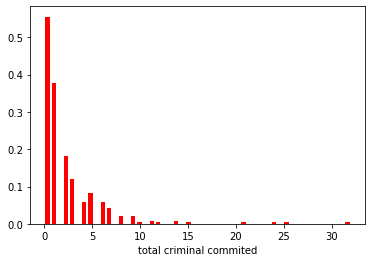

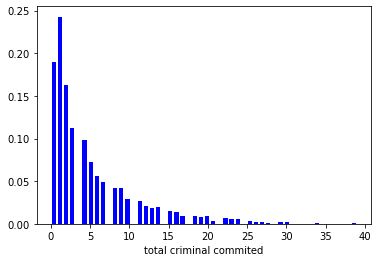

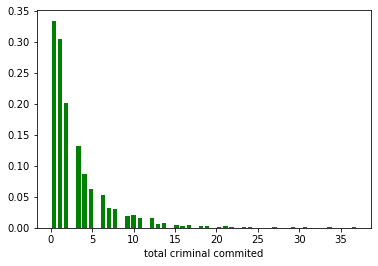

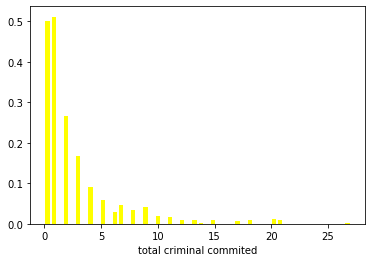

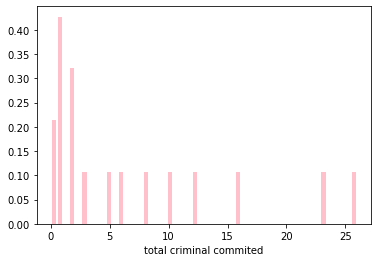

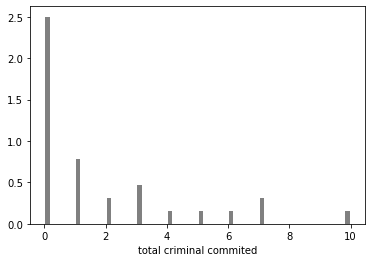

In [208]:
def Hist_plot(race_cat, color):
    plt.hist(df1[df1.race == f'{race_cat}']['total_count'], bins = 50, density = True, rwidth = 0.7, color = color)
color = ['red','blue','green','yellow','pink','gray']
for i in list(df1.race.unique()):
    Hist_plot(i, color[list(df1.race.unique()).index(i)])
    plt.xlabel('total criminal commited')
    plt.show()
'''Lets graph the distribution of total criminal count for each race group'''

In [201]:
len(df1[df1.race == 'Native American'])
'''I found that there are only 18 Native American in the whold data, which can't make interference to whether
compas is biased toward Native American'''

18

In [195]:
df1

,id,sex,race,c_offense_date,r_offense_date,decile_score,c_charge_degree,priors_count,is_recid,total_count
0,1,Male,Other,8/13/13,NaN,1,F,0,0,0
1,3,Male,African-American,1/26/13,7/5/13,3,F,0,1,1
2,4,Male,African-American,4/13/13,6/16/13,4,F,4,1,5
3,5,Male,African-American,1/12/13,NaN,8,F,1,0,1
4,6,Male,Other,NaN,NaN,1,F,2,0,2
...,...,...,...,...,...,...,...,...,...,...
7209,10996,Male,African-American,11/22/13,NaN,7,F,0,0,0
7210,10997,Male,African-American,1/31/14,NaN,3,F,0,0,0
7211,10999,Male,Other,1/13/14,NaN,1,F,0,0,0
7212,11000,Female,African-American,3/8/14,NaN,2,M,3,0,3


In [181]:
df1.c_charge_degree.unique() # F = Felony, M = misdemeanor

array(['F', 'M'], dtype=object)

In [182]:
def outlier(Series):
    Q1 = np.quantile(list(Series), 0.25)
    Q3 = np.quantile(list(Series), 0.75)
    IQR = Q3 - Q1
    a = Q1 - IQR
    b = Q3 + IQR
    return a , b

In [183]:
print(outlier(df1.priors_count)[1] )
'''Find out the outlier of the columns priors_count, otherwise the sample that with priors_count greater
than 10 is too small, not strong enough to make reference to the population''' 

10.0


'Find out the outlier of the columns priors_count, otherwise the sample that with priors_count greater\nthan 10 is too small, not strong enough to make reference to the population'

In [184]:
df2 = df1[df1['priors_count'] <= 10]
df2

,id,sex,race,c_offense_date,r_offense_date,decile_score,c_charge_degree,priors_count,is_recid
0,1,Male,Other,8/13/13,NaN,1,F,0,0
1,3,Male,African-American,1/26/13,7/5/13,3,F,0,1
2,4,Male,African-American,4/13/13,6/16/13,4,F,4,1
3,5,Male,African-American,1/12/13,NaN,8,F,1,0
4,6,Male,Other,NaN,NaN,1,F,2,0
...,...,...,...,...,...,...,...,...,...
7209,10996,Male,African-American,11/22/13,NaN,7,F,0,0
7210,10997,Male,African-American,1/31/14,NaN,3,F,0,0
7211,10999,Male,Other,1/13/14,NaN,1,F,0,0
7212,11000,Female,African-American,3/8/14,NaN,2,M,3,0


'The result is that African-American are rating slightly higher than the other races'

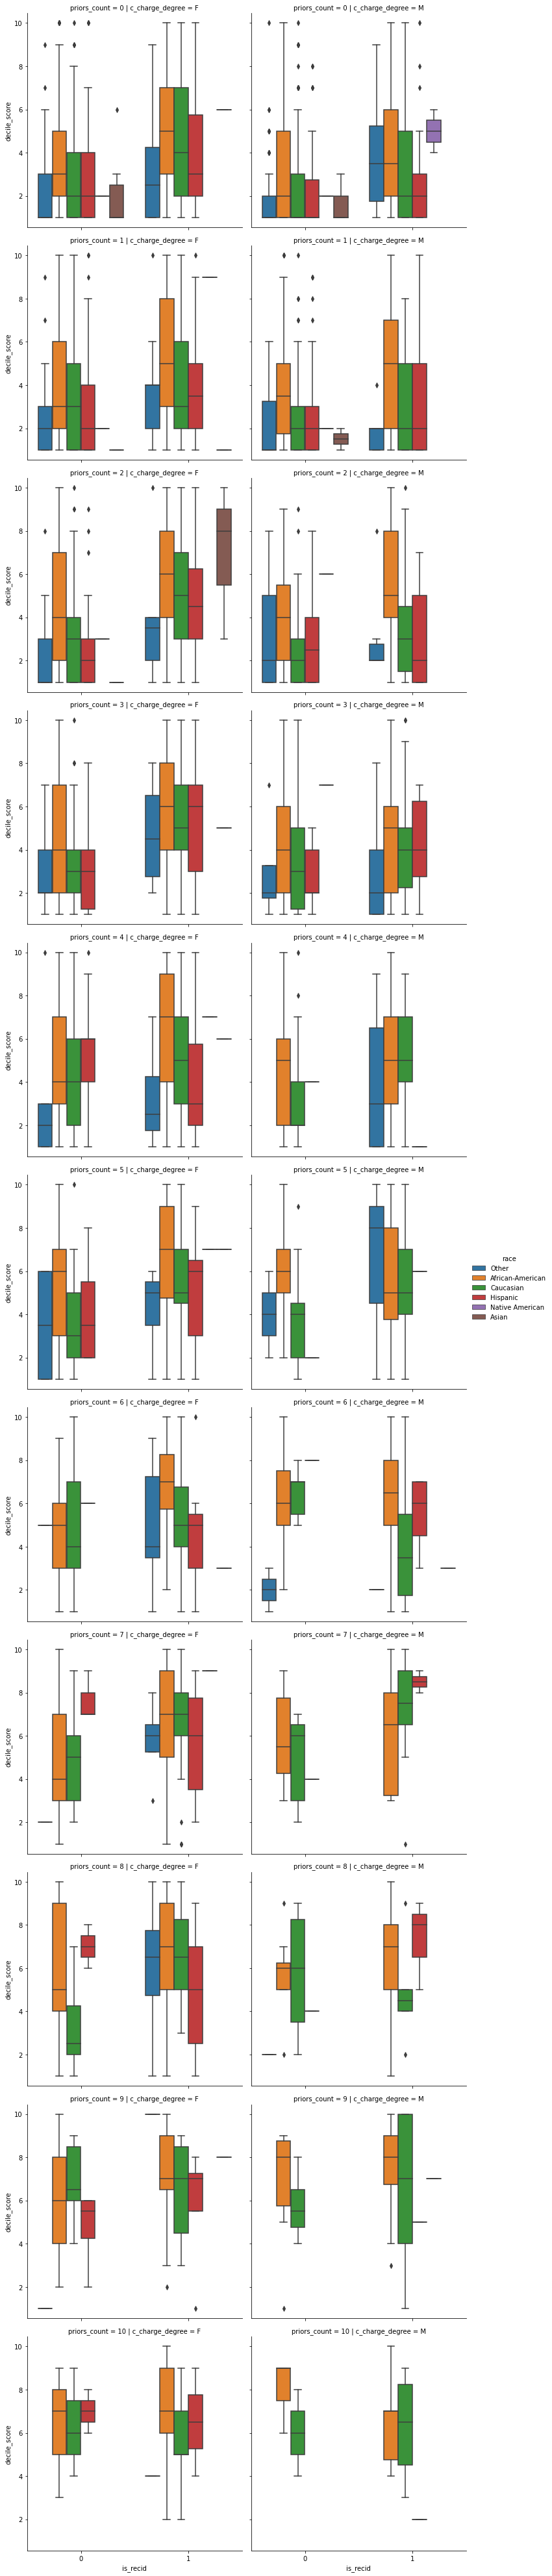

In [185]:
sns.catplot(x = 'is_recid', y = 'decile_score', data = df2 ,kind = 'box', col = 'c_charge_degree', 
            row = 'priors_count', hue = 'race')
'''Since they have the same c_charger_degree, priors_count and is_recid in each graph, we can compare the 
decile score for African_American fairly'''
'''The result is that African-American are rating slightly higher than the other races'''

In [186]:
##############################################################